In [130]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np

# Data CO2 Emmisions

In [131]:
#load dataset
df_co2=pd.read_csv("/Users/mihaicata/TUW/Semester 2 W2021/Data Oriented Programming Paradigms/DOPP/Co2Emissions/CO2_location_year_CO2_full_time_period.csv")


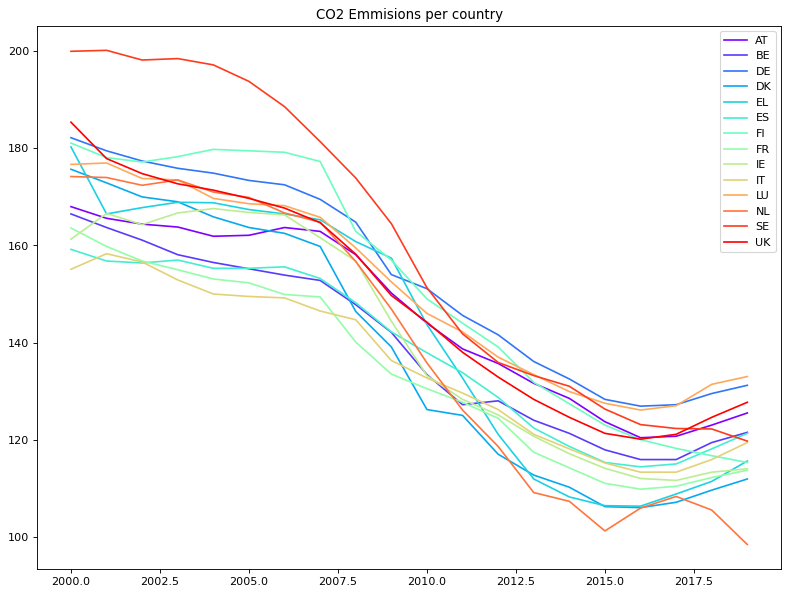

In [132]:
def plot_co2_emmisions_by_country(plot_title):  
    figure(figsize=(12, 9), dpi=80)
    #get list of countries
    countries=df_co2["Location"].unique()
    n=len(countries)
    #generate colors
    color = cm.rainbow(np.linspace(0, 1, n))
    i=0
    for country in countries:    
        plt.plot(df_co2[df_co2["Location"]==country]["Year"],df_co2[df_co2["Location"]==country]["Average_CO2_Emission_perkm"],c=color[i],label=country)
        i=i+1
    #show legend
    plt.legend()
    plt.title(plot_title)
    plt.show()
    
plot_co2_emmisions_by_country  ("CO2 Emmisions per country")  

# Data Modal Split

In [133]:
#load dataset
df_modal_split=pd.read_csv("/Users/mihaicata/TUW/Semester 2 W2021/Data Oriented Programming Paradigms/DOPP/ModalSplit/MODSPLIT_vehicletype_country_year_percentage_full_time_period_all_countries.csv")


In [134]:
#examine data structure for a country
df_modal_split[df_modal_split["Country"]=="AT"].head(10)

,VehicleType,Country,Year,Percentage
0,BUS_TOT,AT,2019,10.1
37,CAR,AT,2019,77.0
74,TRN,AT,2019,12.9
108,TRN_BUS_TOT_AVD,AT,2019,23.0
145,BUS_TOT,AT,2018,10.1
182,CAR,AT,2018,77.1
219,TRN,AT,2018,12.9
253,TRN_BUS_TOT_AVD,AT,2018,22.9
290,BUS_TOT,AT,2017,9.3
327,CAR,AT,2017,78.6


In [135]:
#restructure columns for the bar plot
modal_europe_yearly=df_modal_split[df_modal_split["Country"]=="EU27_2020"].pivot_table("Percentage",["Year"],"VehicleType")
#remove last column
del modal_europe_yearly["TRN_BUS_TOT_AVD"]
#add year column
modal_europe_yearly["Yr"]=modal_europe_yearly.index.values
modal_europe_yearly.head(10)

VehicleType,BUS_TOT,CAR,TRN,Yr
Year,,,,
2000,11.0,81.6,7.4,2000
2001,10.8,82.0,7.3,2001
2002,10.5,82.5,7.0,2002
2003,10.4,82.8,6.8,2003
2004,10.4,82.7,6.9,2004
2005,10.4,82.6,7.0,2005
2006,10.2,82.6,7.1,2006
2007,10.4,82.3,7.2,2007
2008,10.4,82.2,7.4,2008


Text(0, 0.5, 'Percentage')

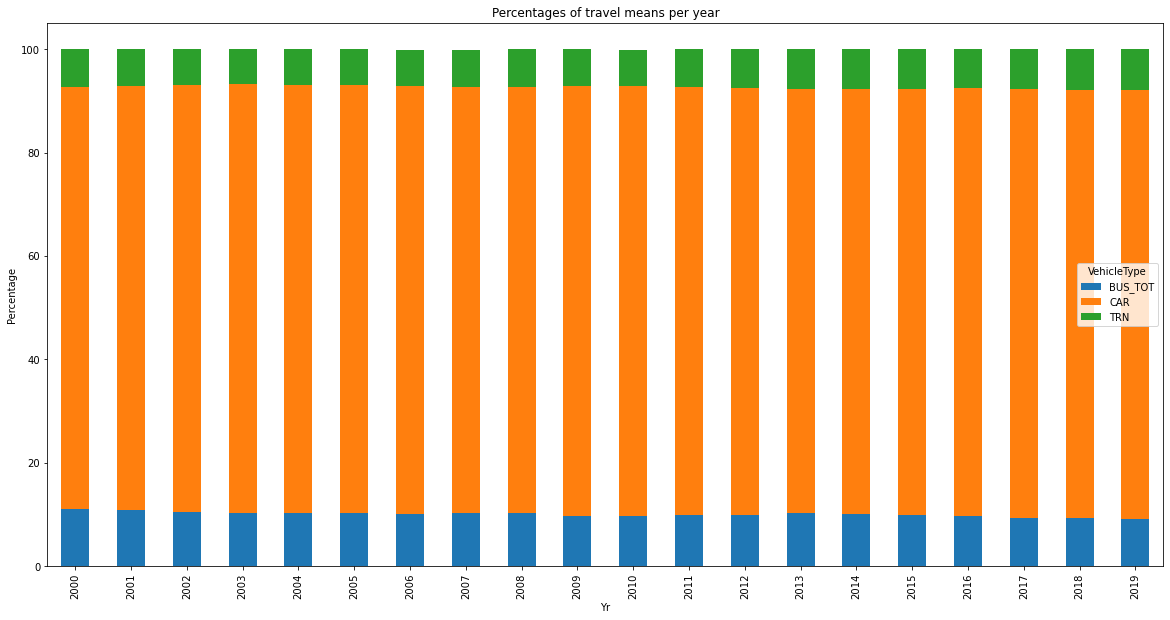

In [136]:
#stacked bar plot
#Q: how did the usage of means of trainsportations change over the years
modal_plot=modal_europe_yearly.plot(
  x = 'Yr', 
  kind = 'bar', 
  stacked = True, 
  title = 'Percentages of travel means per year', 
  mark_right = True,
  figsize=(20,10))
modal_plot.set_ylabel("Percentage")
#A: on a european level, it didn't change much in the last 20 years

In [137]:
modal_europe_yearly.head(10)

VehicleType,BUS_TOT,CAR,TRN,Yr
Year,,,,
2000,11.0,81.6,7.4,2000
2001,10.8,82.0,7.3,2001
2002,10.5,82.5,7.0,2002
2003,10.4,82.8,6.8,2003
2004,10.4,82.7,6.9,2004
2005,10.4,82.6,7.0,2005
2006,10.2,82.6,7.1,2006
2007,10.4,82.3,7.2,2007
2008,10.4,82.2,7.4,2008


<AxesSubplot:title={'center':'Percentages of travel means per year'}, xlabel='Yr'>

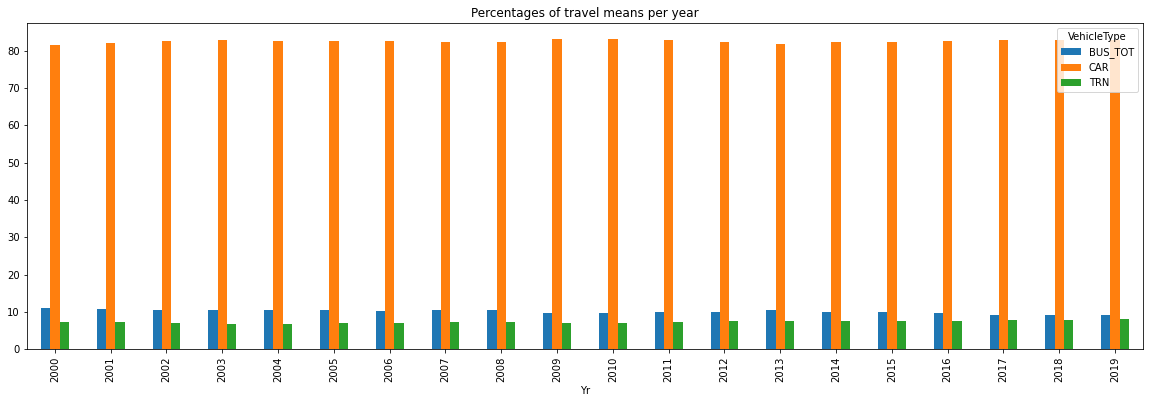

In [138]:
  # plot grouped bar chart
modal_europe_yearly.plot(x='Yr',
        kind='bar',
        stacked=False,
        title='Percentages of travel means per year',
                        figsize=(20,6))



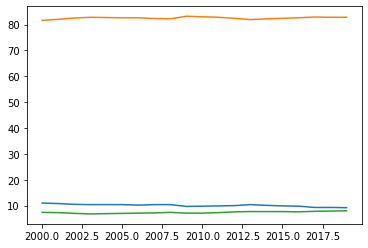

In [139]:
modalities=["BUS_TOT","CAR","TRN"]
for i in modalities:
    plt.plot(modal_europe_yearly["Yr"],modal_europe_yearly[i])
plt.show()

### Plots per country

Let's now examine the modal split distribution in every country.

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow_env/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


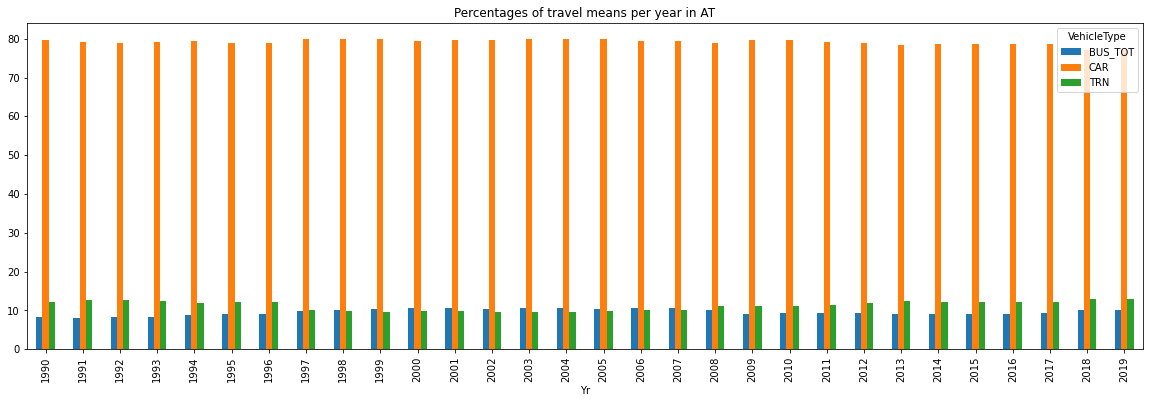

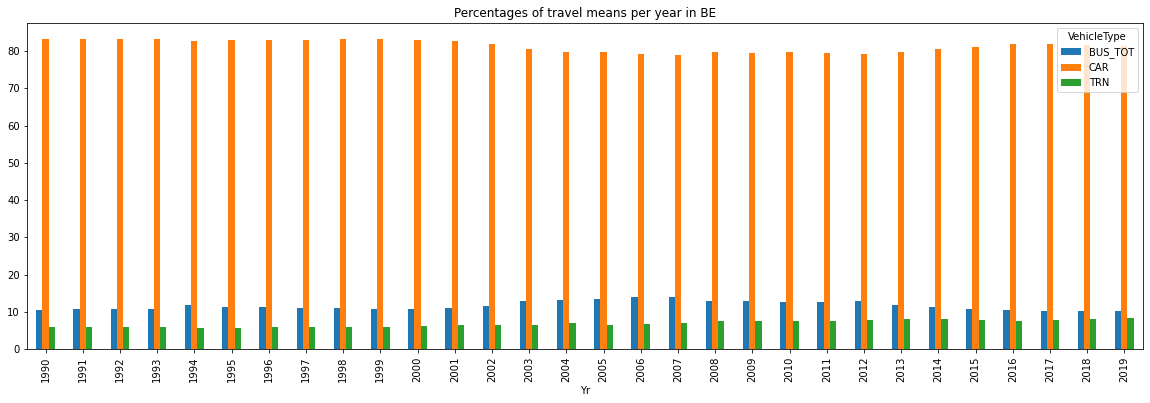

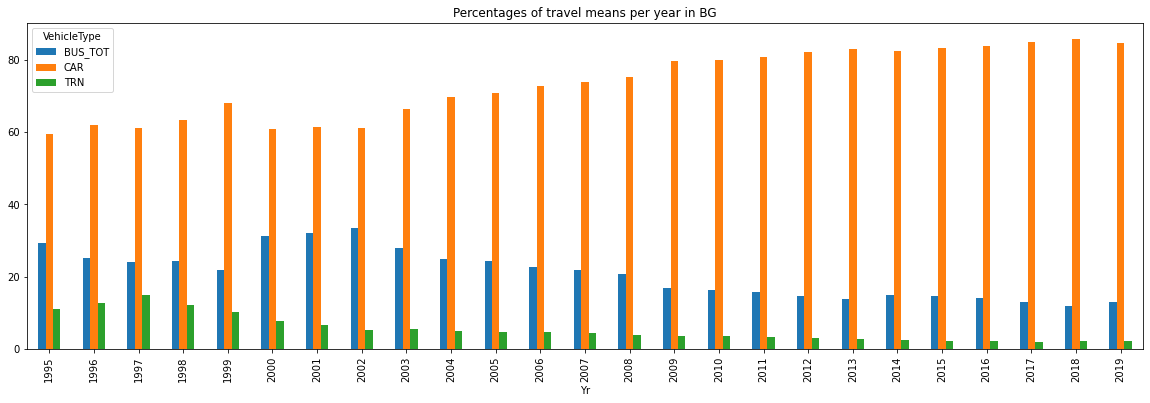

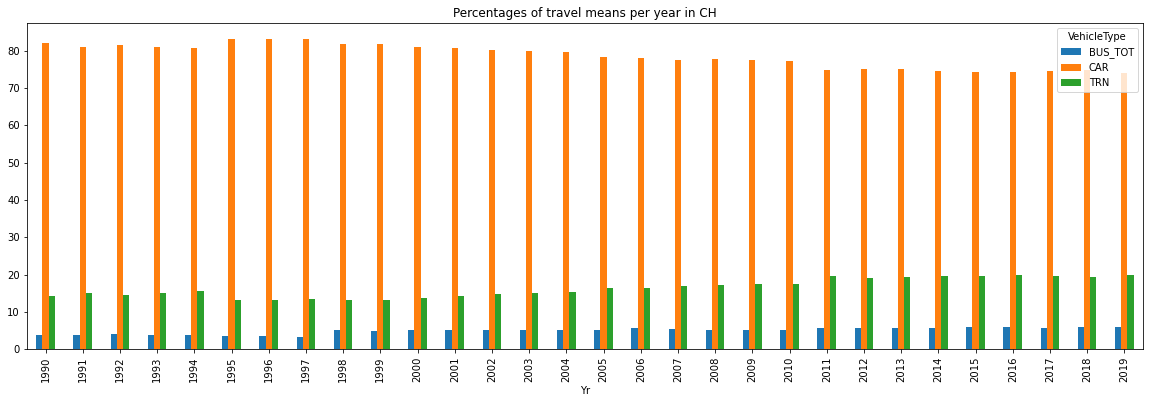

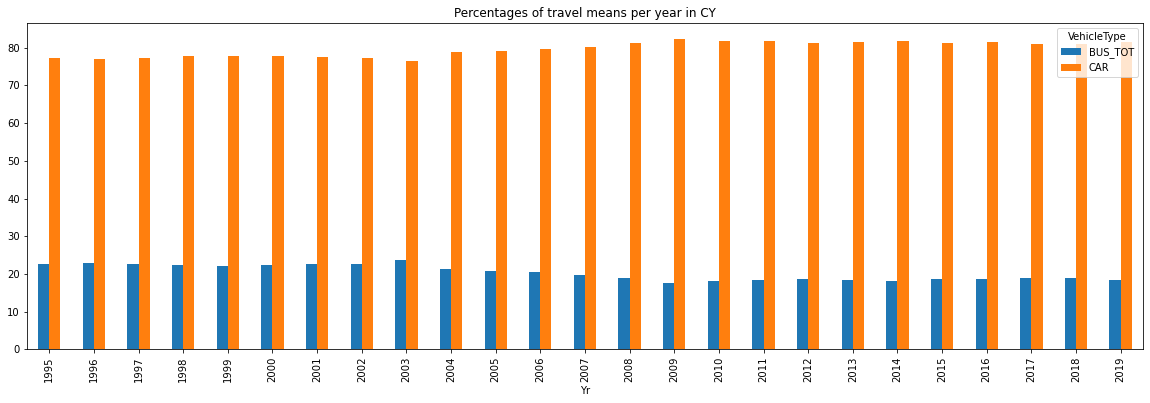

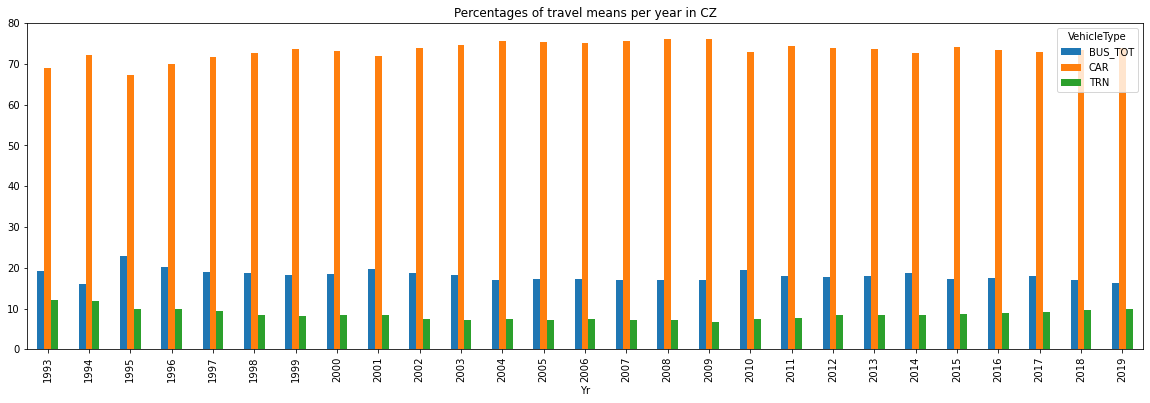

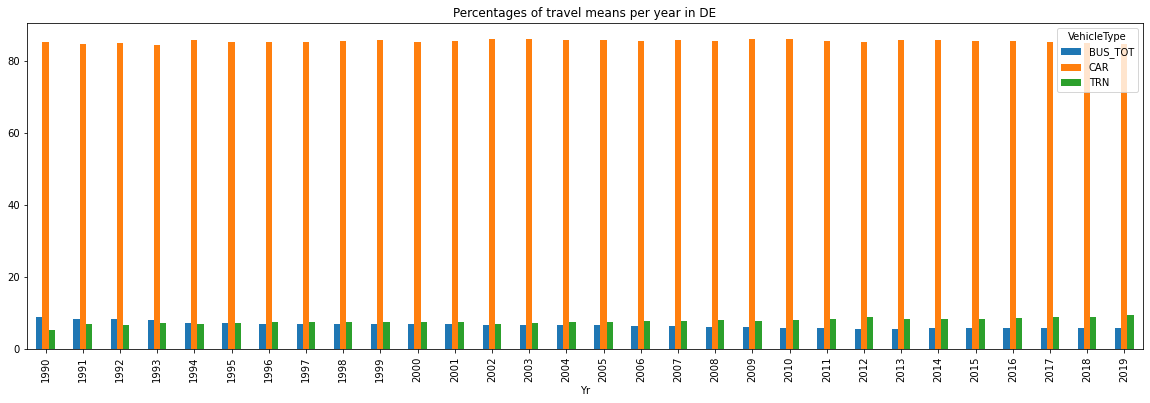

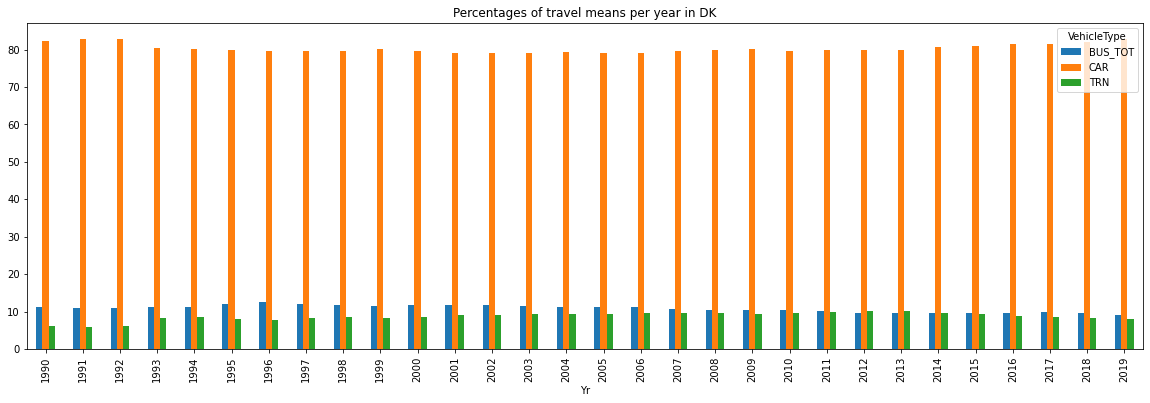

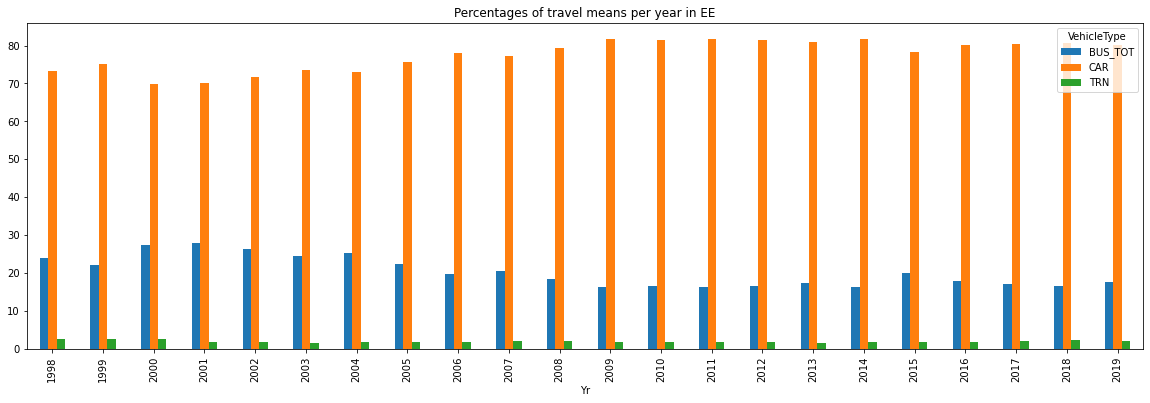

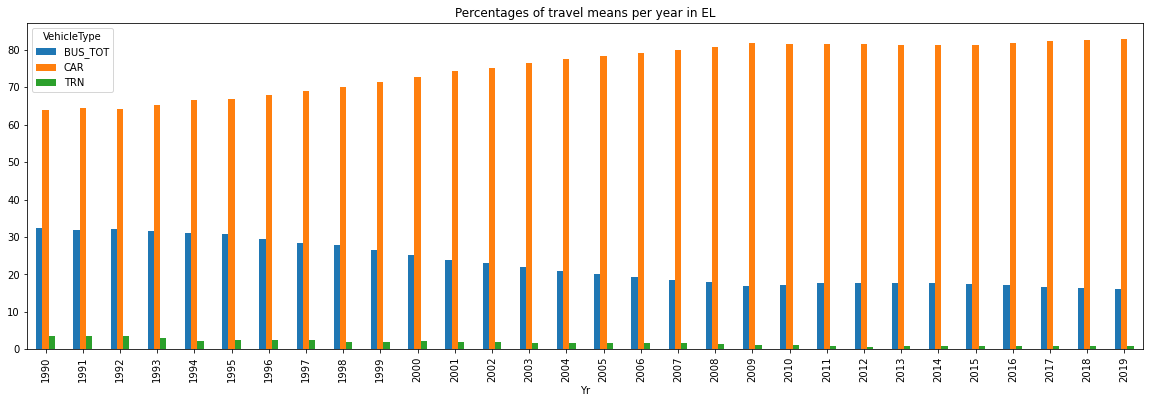

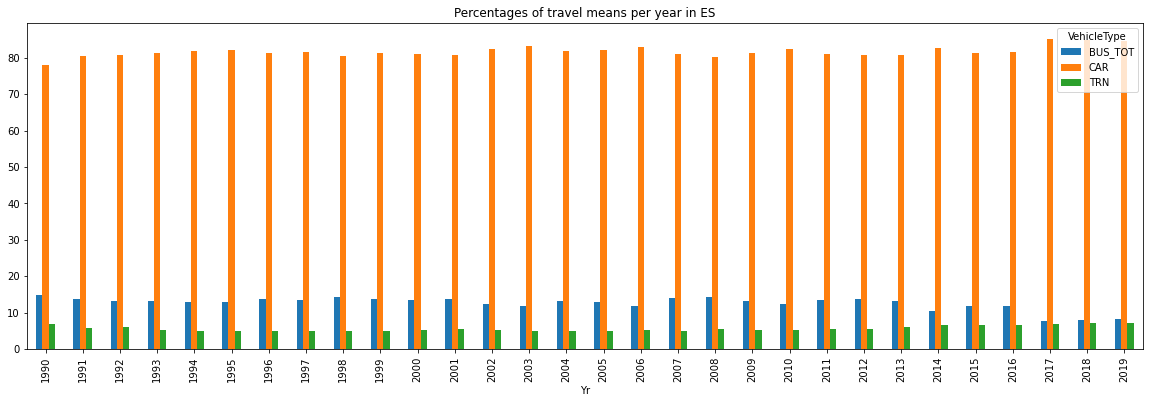

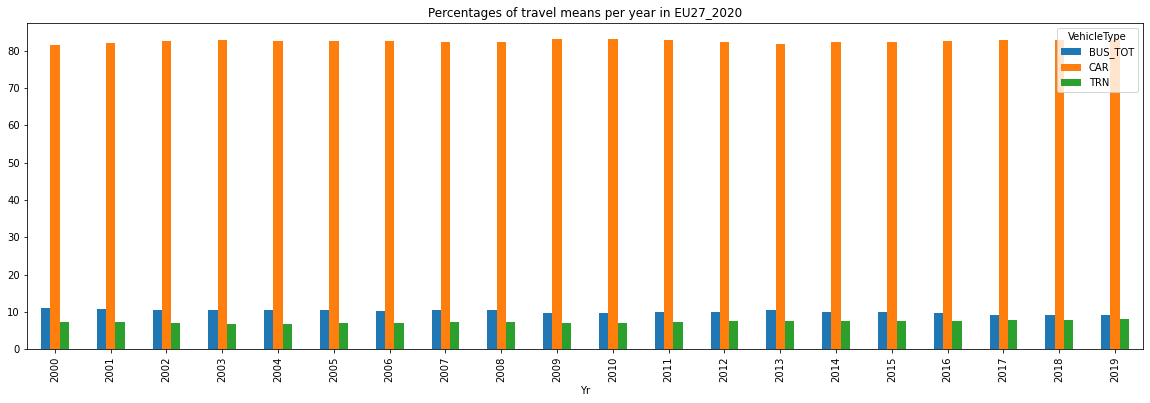

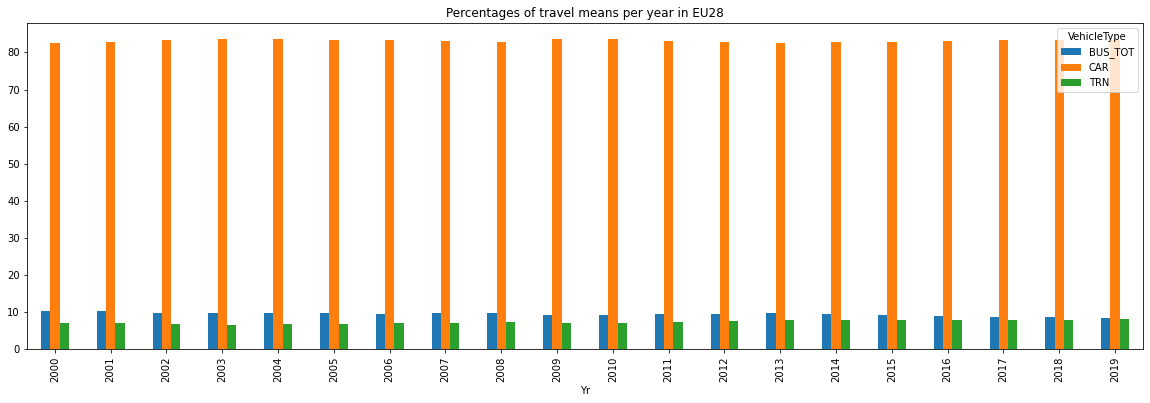

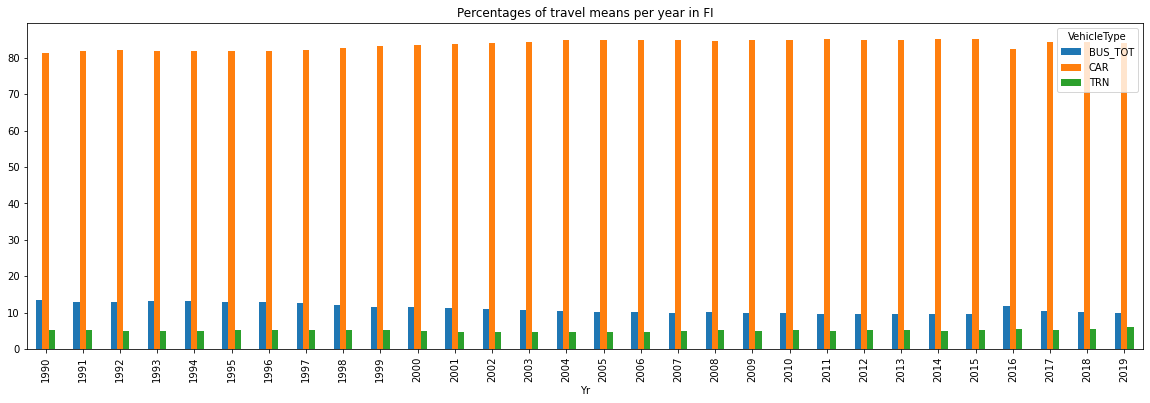

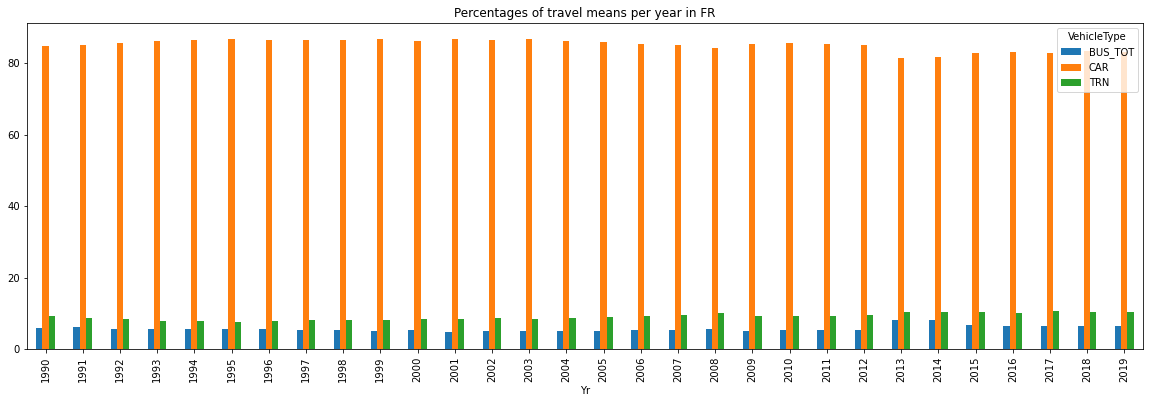

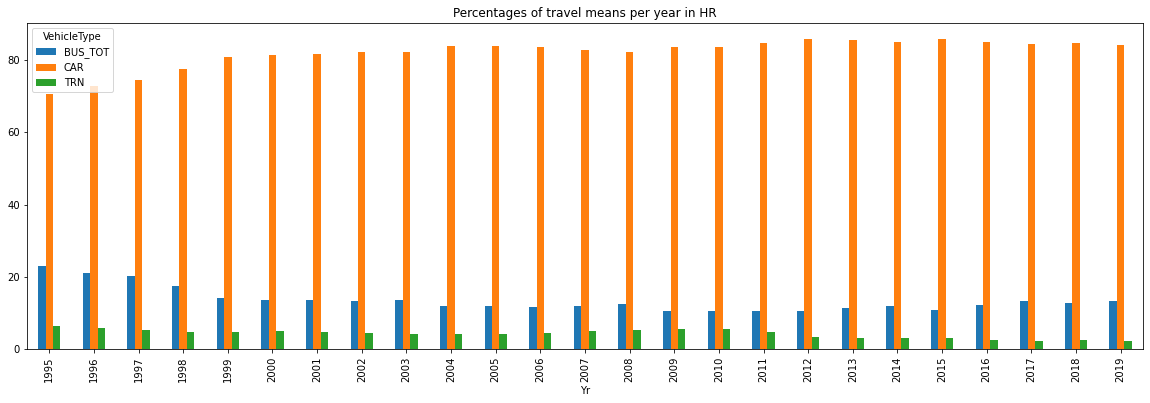

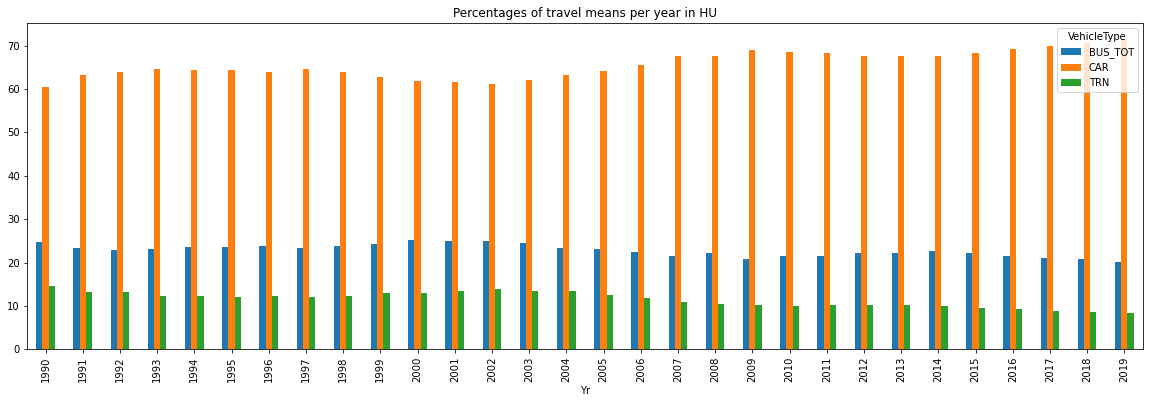

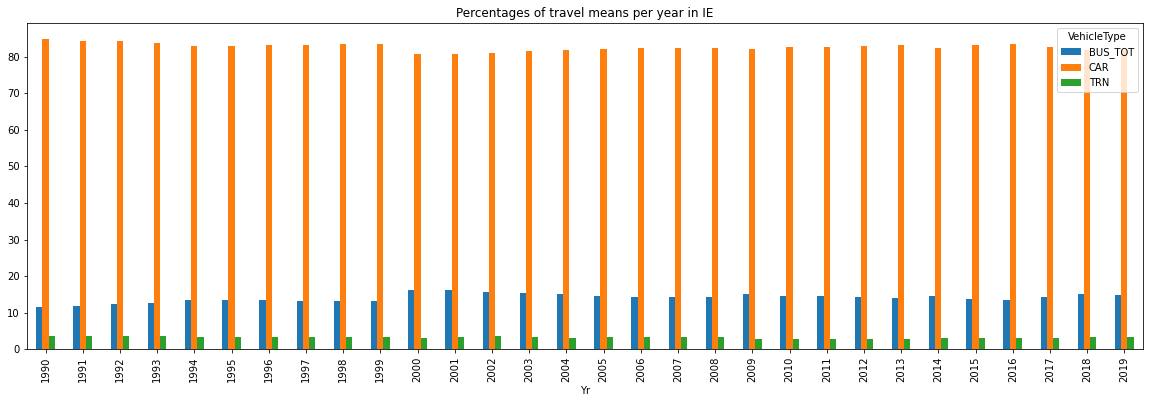

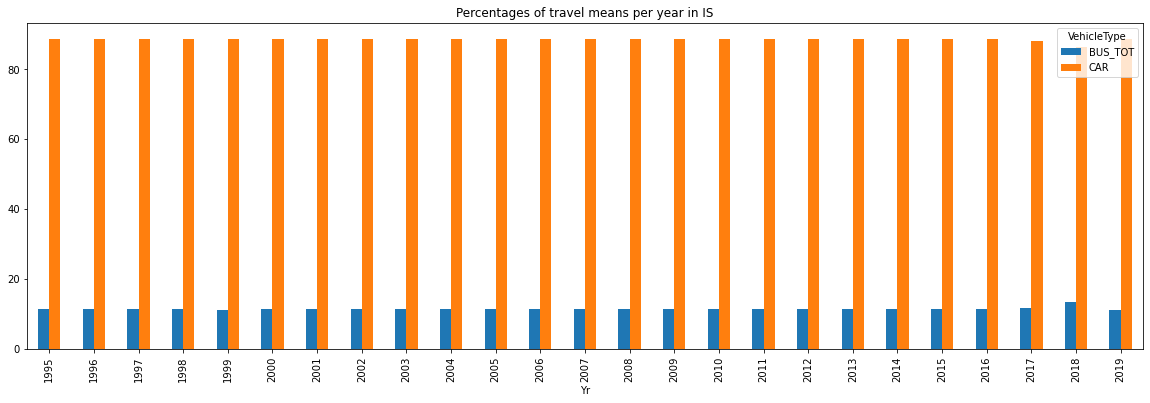

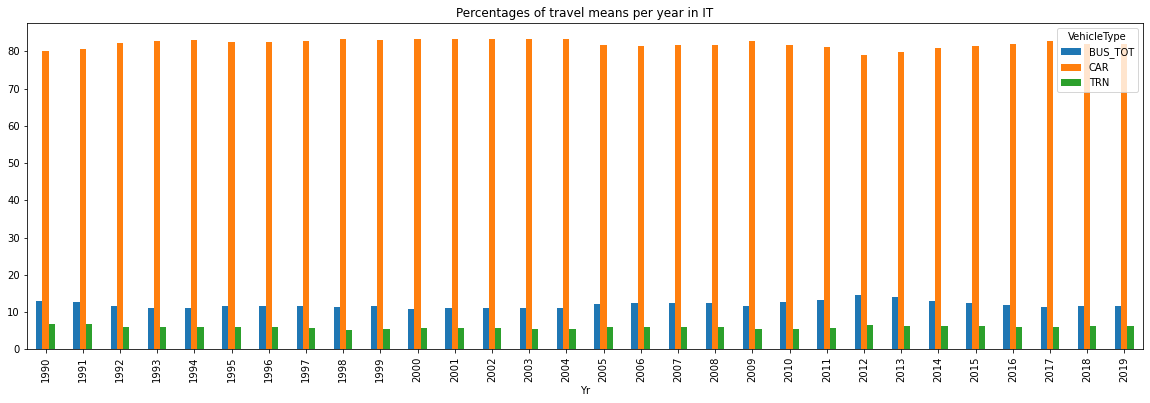

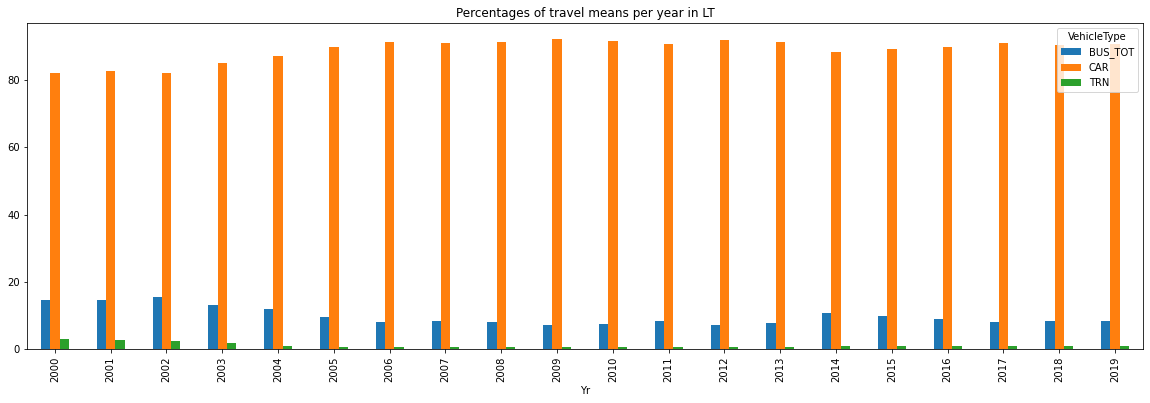

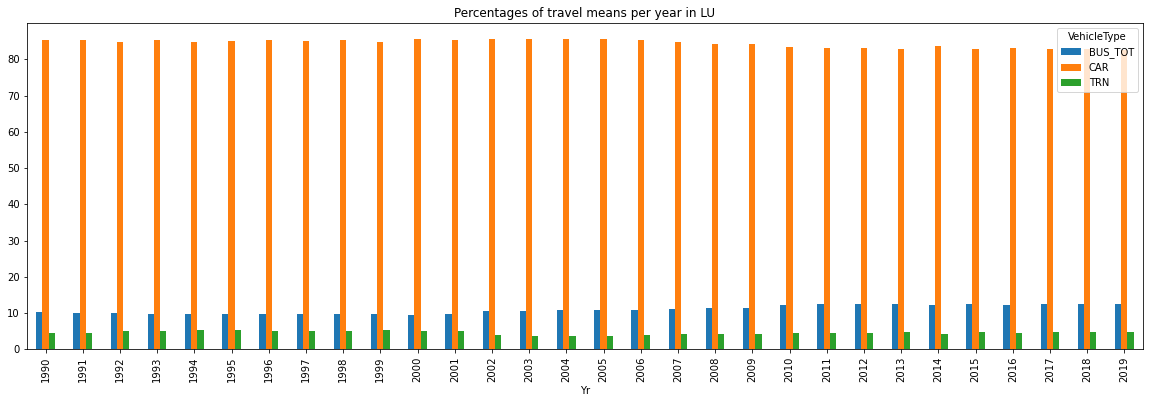

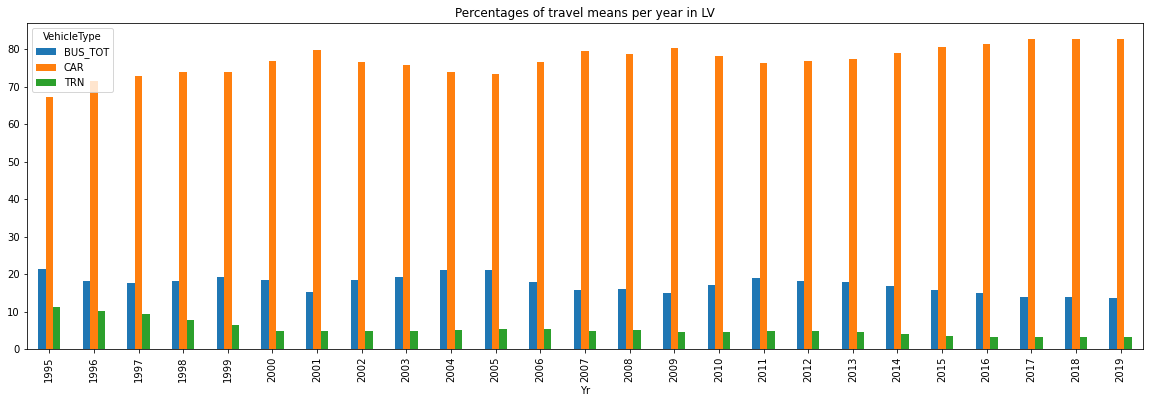

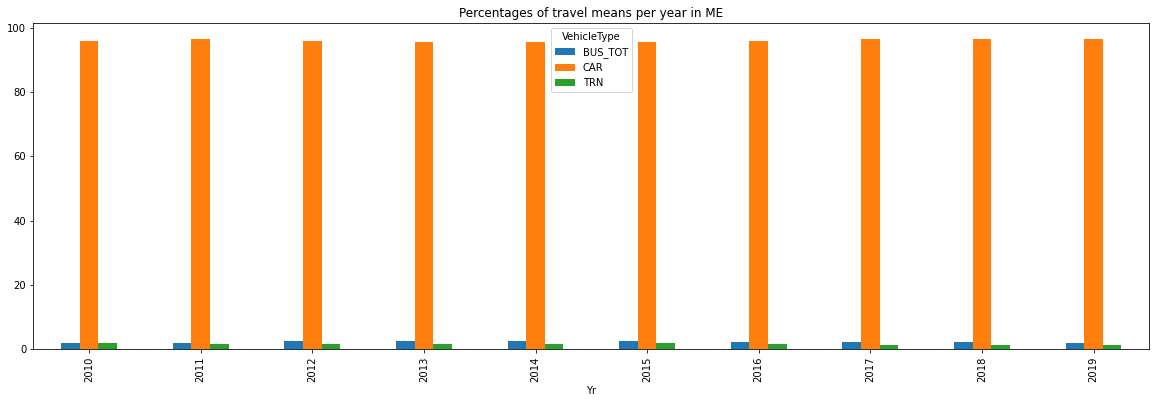

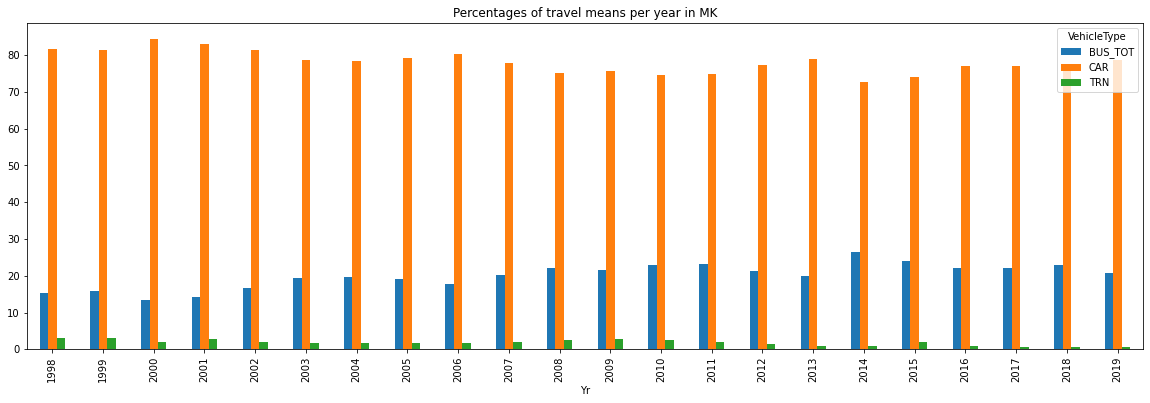

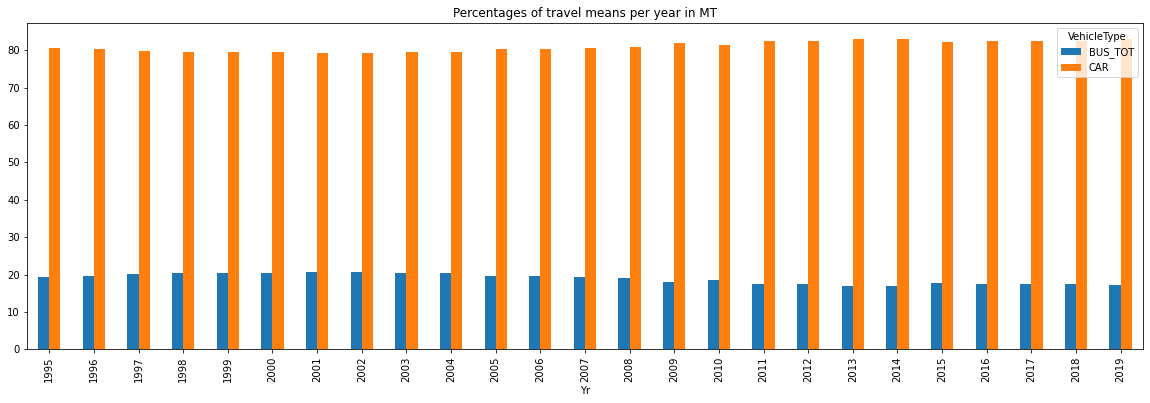

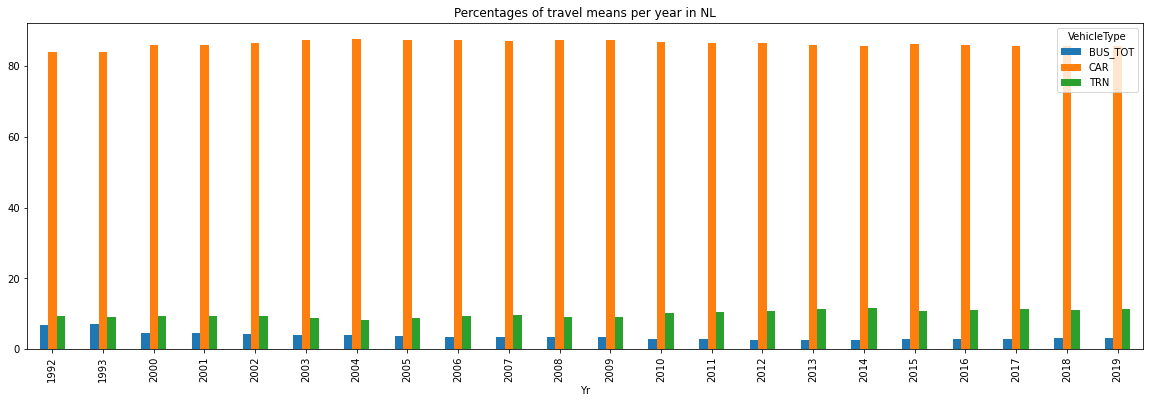

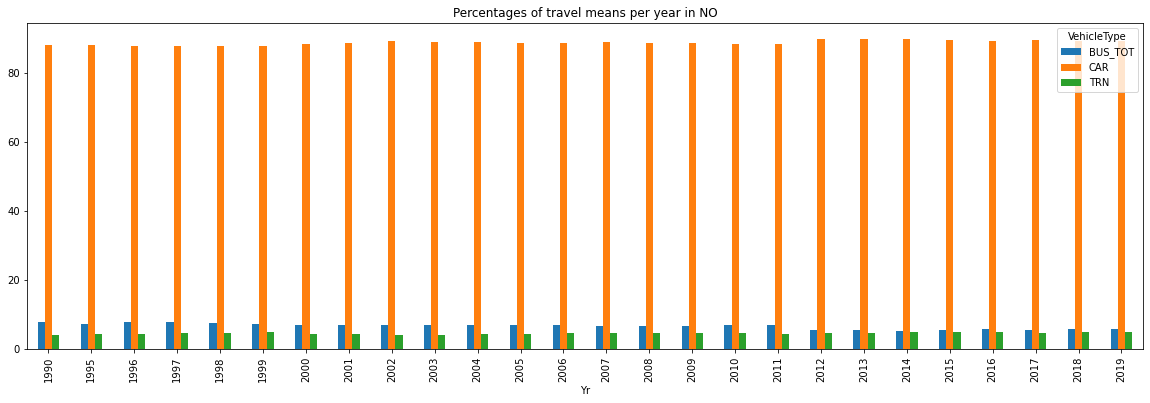

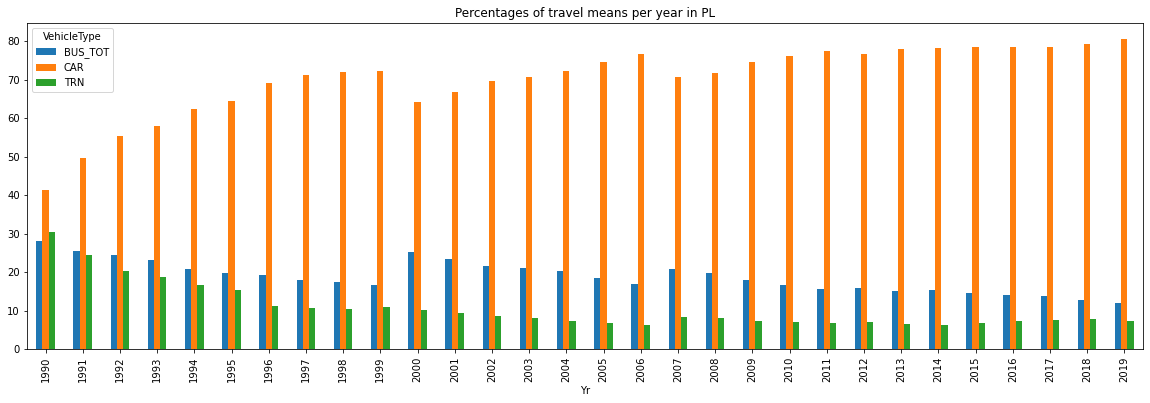

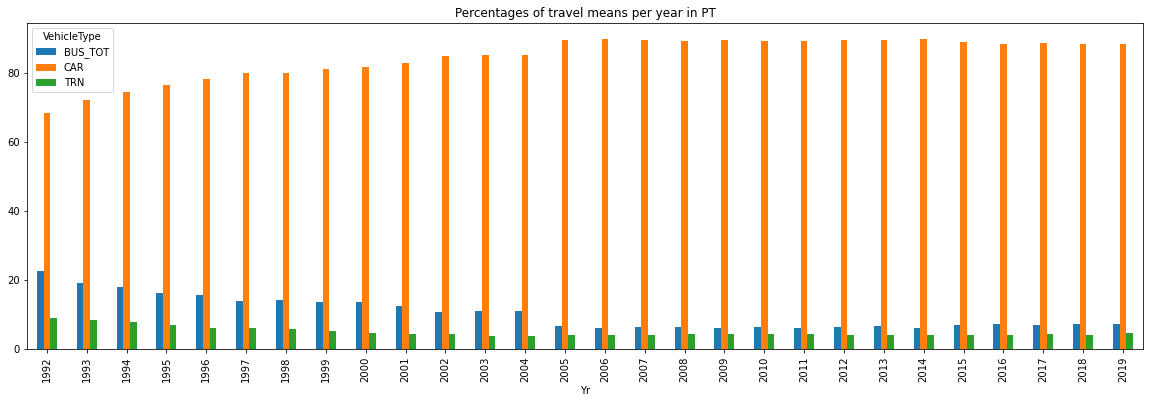

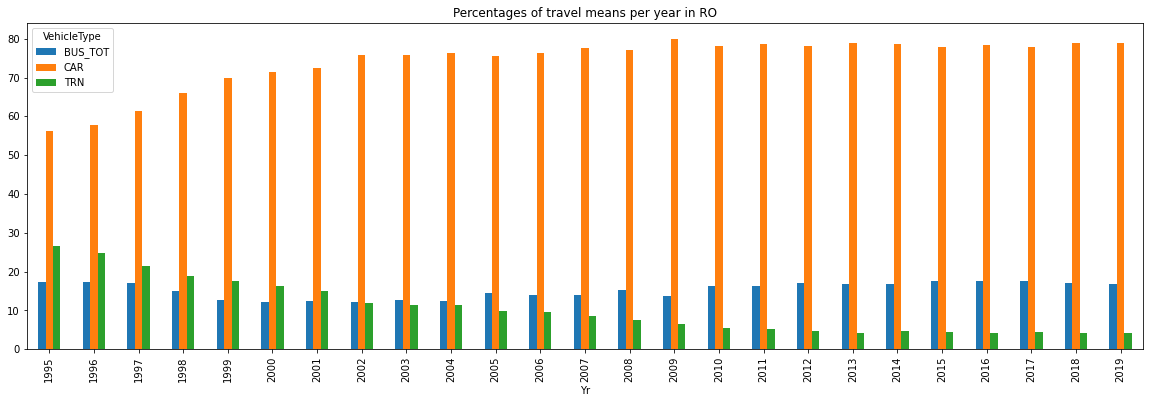

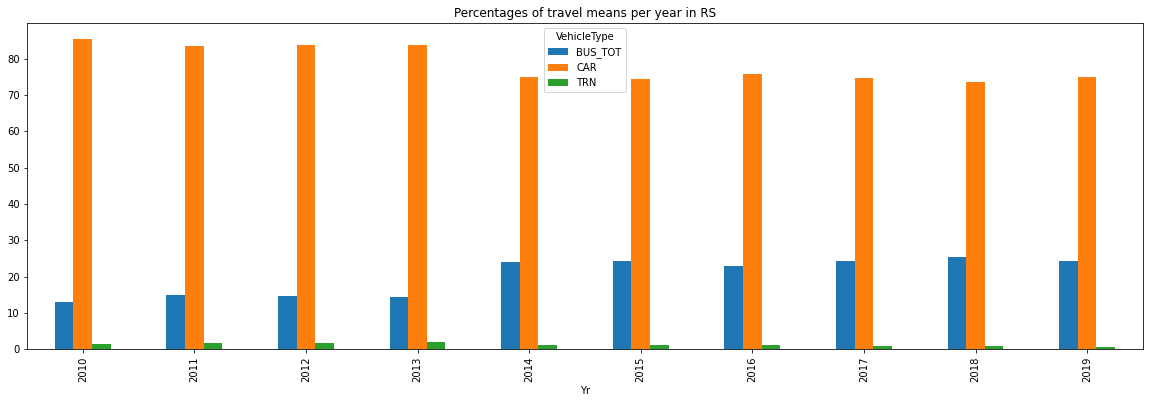

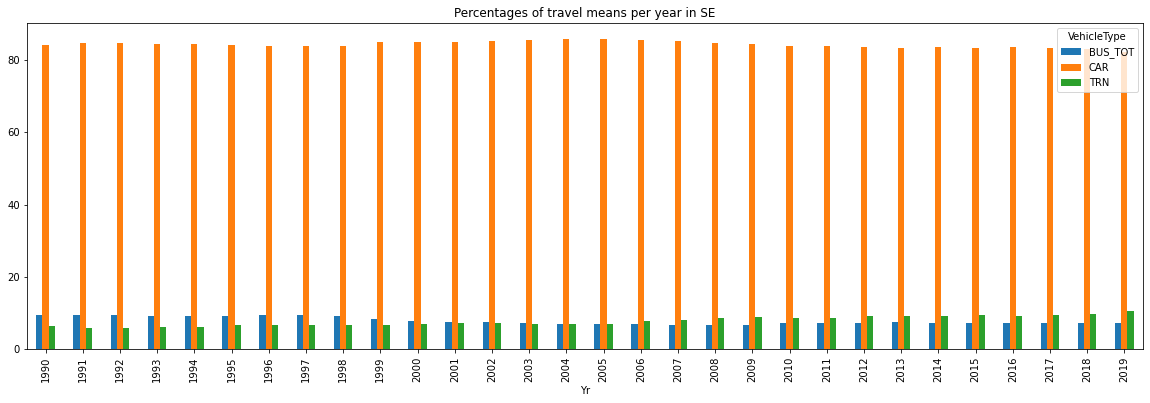

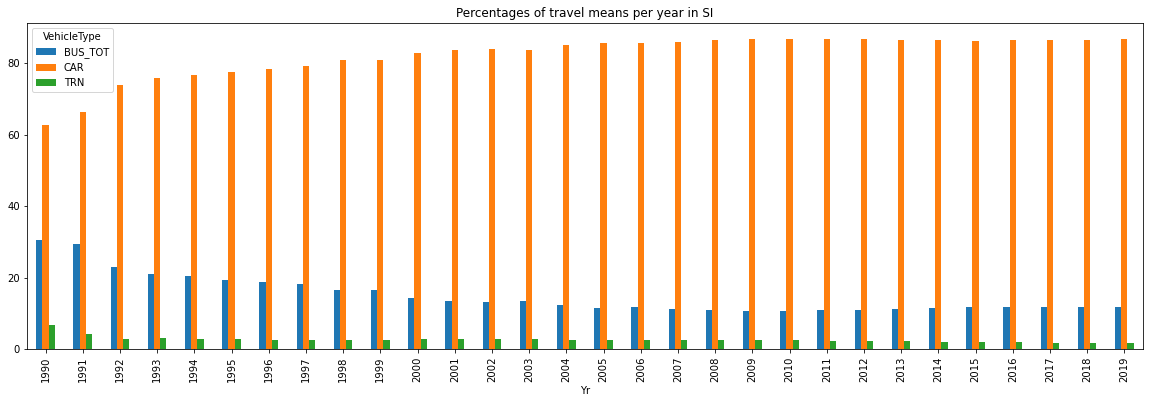

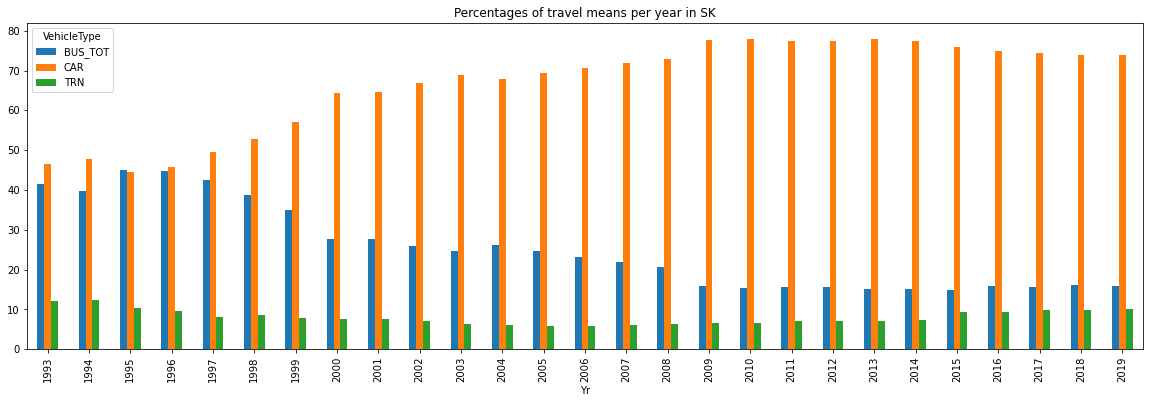

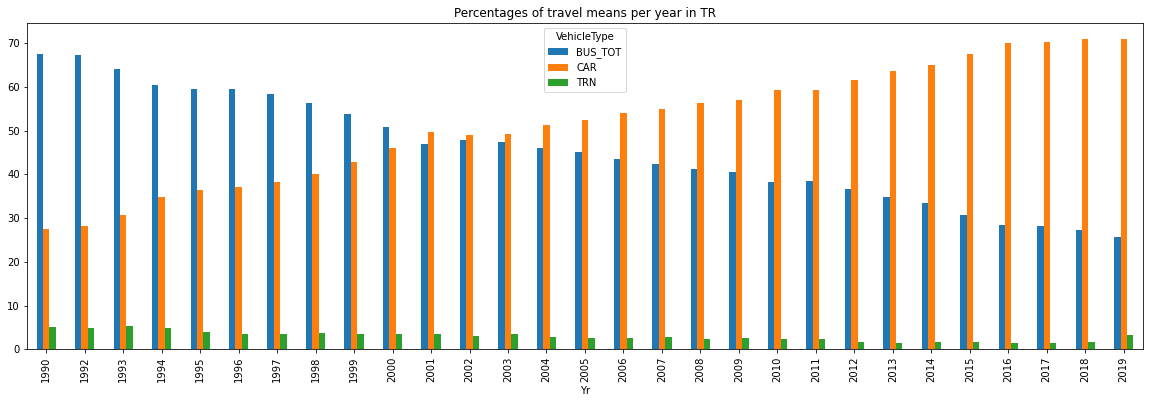

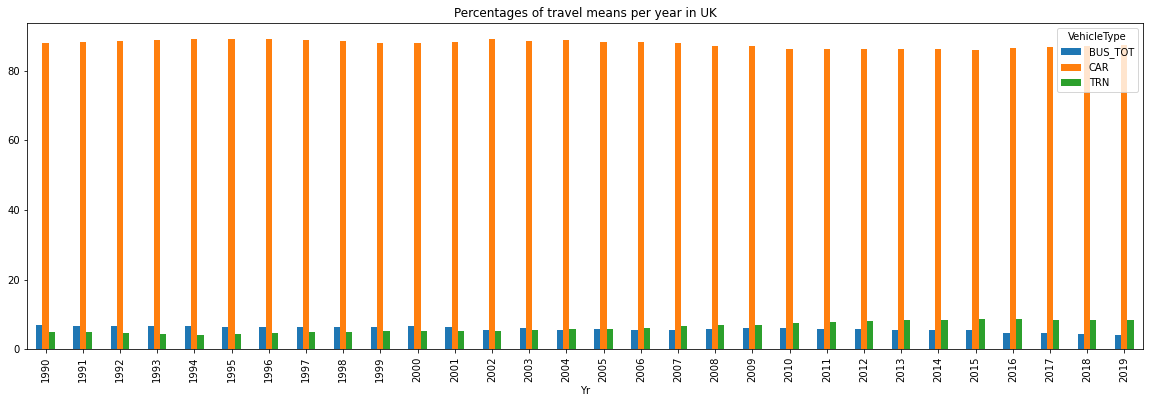

In [140]:
def plot_modal_split_all_countries():
    countries=df_modal_split["Country"].unique()    
    for cnt in countries:
        modal_europe_yearly=df_modal_split[df_modal_split["Country"]==cnt].pivot_table("Percentage",["Year"],"VehicleType")
        #remove last column
        del modal_europe_yearly["TRN_BUS_TOT_AVD"]
        #add year column
        modal_europe_yearly["Yr"]=modal_europe_yearly.index.values
        modal_plot=modal_europe_yearly.plot(x='Yr',
            kind='bar',
            stacked=False,
            title='Percentages of travel means per year in '+cnt,
                        figsize=(20,6))

        
plot_modal_split_all_countries()       


In Bulgaria, Slovakia, Romania and Greece we can see an increase in car usage and a decrease in train usage and bus usage.
Some countries like Cyprus, Israel and Malta don't have a train infrastructure whatsoever, due to their size.
Russia is the only country that shows a decrease in car usage.
In Turkey car transport more than doubled, while bus transport more than halved.

# Data GDP

In [141]:
#load dataset
df_gdp=pd.read_csv("/Users/mihaicata/TUW/Semester 2 W2021/Data Oriented Programming Paradigms/DOPP/ModalTransportToGDP/GDP_unit_location_year_gdp_full_time_period_all_countries.csv")


The indicator is calculated by taking the ratio between transport performance (in passenger-kilometres) and Gross Domestic Product (GDP) (chain-linked volumes, at 2010 exchange rates), and indexing on a single reference year (2010).

The passenger transport performance should be based on the movements on the respective national territory ('territoriality principle'), regardless of the nationality of the vehicle. However, data collection methodology for road passenger transport is not harmonised at the EU level. Data are collected on a voluntary basis, a variety of sources have been used and also estimates made. Detailed information can be found in the metadata information relating to table tran_hv_psmod on the Modal Split of passenger transport.

The indicators are based on inland transport only. Although statistics on air and sea transport are available, due to their predominantly international nature, there are conceptual difficulties in dealing with these modes in a manner consistent with the inland modes.

The units used for measuring the transport performance for passenger transport are  passenger-kilometre (pkm). Passenger-kilometre represents one passenger travelling a distance of one kilometre.

Text(0, 0.5, 'Passenger-kilometer/GDP')

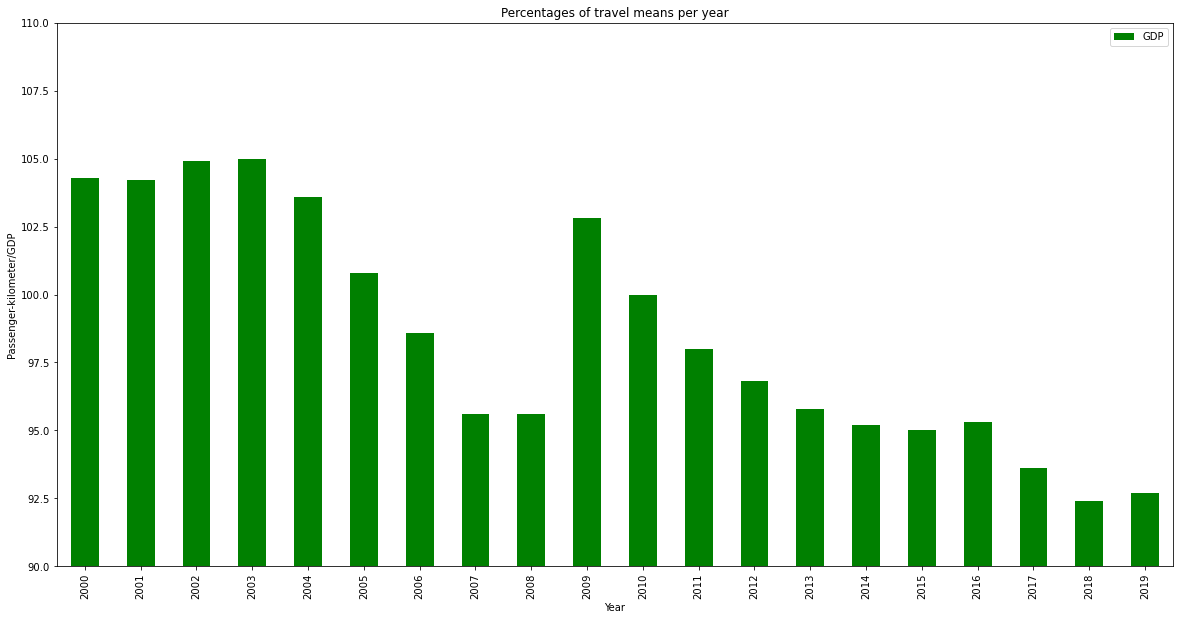

In [142]:
#get aggregated data for entire europe and sort for by year asc
gdp_yearly_europe=df_gdp[df_gdp["Location"]=="EU27_2020"].sort_values("Year").dropna()
ax=gdp_yearly_europe.plot(
  x = 'Year', 
  kind = 'bar', 
  stacked = True, 
  title = 'Percentages of travel means per year', 
  mark_right = True,
  color="green",
  figsize=(20,10))
#set y axis limits
ax.set_ylim(90,110)
ax.set_ylabel("Passenger-kilometer/GDP")

# Data Train Transport

In [143]:
#load dataset
df_train=pd.read_csv("/Users/mihaicata/TUW/Semester 2 W2021/Data Oriented Programming Paradigms/DOPP/RailwayTransport/RW_unit_location_year_RW_full_time_period.csv")


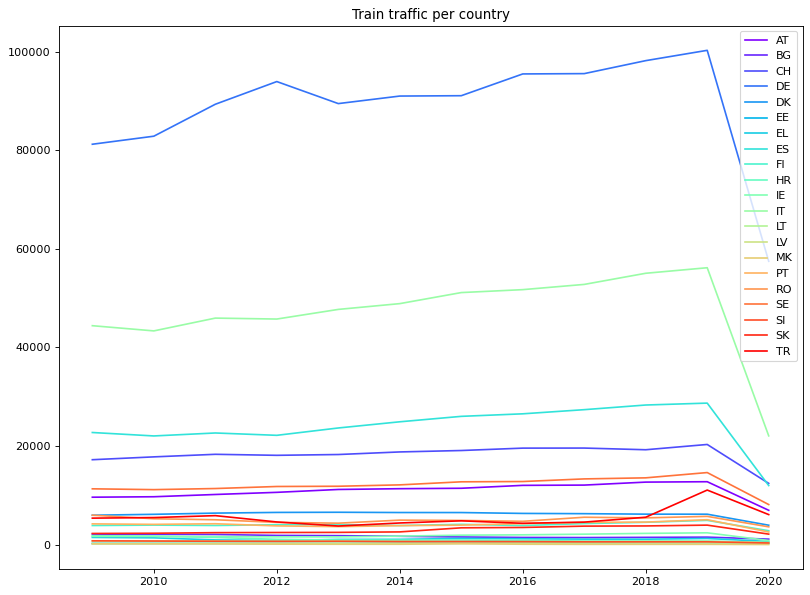

In [144]:
def plot_train_traffic_by_country(plot_title):  
    figure(figsize=(12, 9), dpi=80)
    #get list of countries
    countries=df_train["Location"].unique()
    n=len(countries)
    #generate colors
    color = cm.rainbow(np.linspace(0, 1, n))
    i=0
    for country in countries:    
        plt.plot(df_train[df_train["Location"]==country]["Year"],df_train[df_train["Location"]==country]["Passenger_kilometers_in_millions"],c=color[i],label=country)
        i=i+1
    #show legend
    plt.legend(loc='upper right')    
    plt.title(plot_title)
    plt.show()
plot_train_traffic_by_country  ("Train traffic per country")  

We can see a sharp decline in 2020, probably due to covid.

# Data air transport

In [145]:
df_air=pd.read_csv("/Users/mihaicata/TUW/Semester 2 W2021/Data Oriented Programming Paradigms/DOPP/RelatedToTransport/AirTransport.csv")
df_air.head(10)


,Country,Year,AirTransportKm
0,AT,2009,21817268.0
1,BE,2009,21316690.0
2,BG,2009,5840825.0
3,CH,2009,35928170.0
4,CY,2009,6729787.0
5,CZ,2009,12367467.0
6,DE,2009,158148830.0
7,DK,2009,22277524.0
8,EE,2009,1341294.0
9,EL,2009,33440268.0


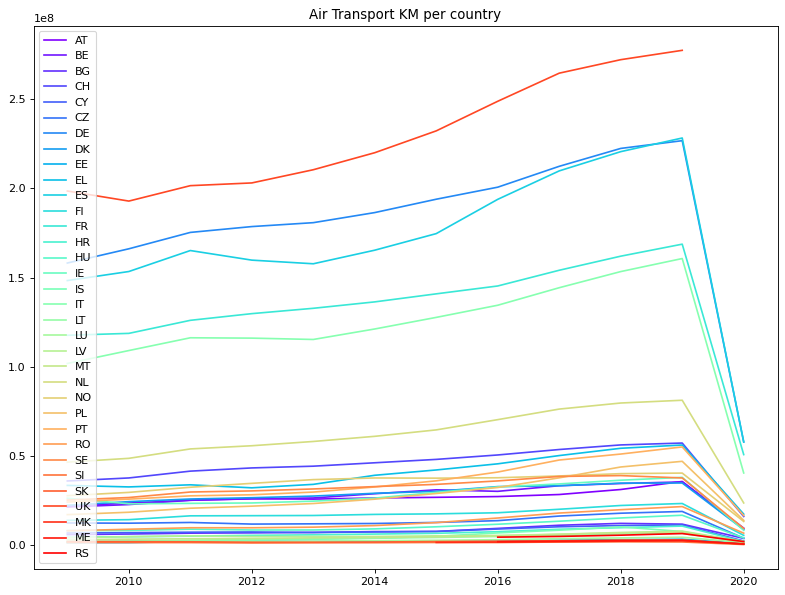

In [146]:
def plot_air_transport_by_country(plot_title):  
    figure(figsize=(12, 9), dpi=80)
    #get list of countries
    countries=df_air["Country"].unique()
    countries=np.delete(countries,[11,12,13])
    n=len(countries)
    #generate colors
    color = cm.rainbow(np.linspace(0, 1, n))
    i=0
    for country in countries:    
        plt.plot(df_air[df_air["Country"]==country]["Year"],df_air[df_air["Country"]==country]["AirTransportKm"],c=color[i],label=country)
        i=i+1
    #show legend
    plt.legend(loc='upper left')
    plt.title(plot_title)
    plt.show()
    
plot_air_transport_by_country  ("Air Transport KM per country")  

Generally we can see an increasing trend for each country, and then a big crash in 2020 due to Covid.

# Data road traffic deaths

In [147]:
df_road_deaths=pd.read_csv("/Users/mihaicata/TUW/Semester 2 W2021/Data Oriented Programming Paradigms/DOPP/RelatedToTransport/RoadTrafficDeaths.csv")
df_road_deaths.head(10)


,TypeOfRoad,Unit,Country,Year,RoadTrafficDeaths
0,MWAY,NR,AT,2000,126.0
1,MWAY,NR,BE,2000,236.0
2,MWAY,NR,CZ,2000,45.0
3,MWAY,NR,DE,2000,907.0
4,MWAY,NR,DK,2000,29.0
5,MWAY,NR,EL,2000,61.0
6,MWAY,NR,ES,2000,347.0
7,MWAY,NR,FI,2000,13.0
8,MWAY,NR,FR,2000,517.0
9,MWAY,NR,IE,2000,4.0


In [148]:
#keep just the total number of deaths
df_road_deaths=df_road_deaths[df_road_deaths["TypeOfRoad"]=="TOTAL"]
df_road_deaths[df_road_deaths["Unit"]=="RT"].head(10)

,TypeOfRoad,Unit,Country,Year,RoadTrafficDeaths
148,TOTAL,RT,AT,2000,12.2
149,TOTAL,RT,BE,2000,14.3
150,TOTAL,RT,BG,2000,12.4
151,TOTAL,RT,CH,2000,8.2
152,TOTAL,RT,CY,2000,16.0
153,TOTAL,RT,CZ,2000,14.5
154,TOTAL,RT,DE,2000,9.1
155,TOTAL,RT,DK,2000,9.3
156,TOTAL,RT,EE,2000,14.6
157,TOTAL,RT,EL,2000,18.9


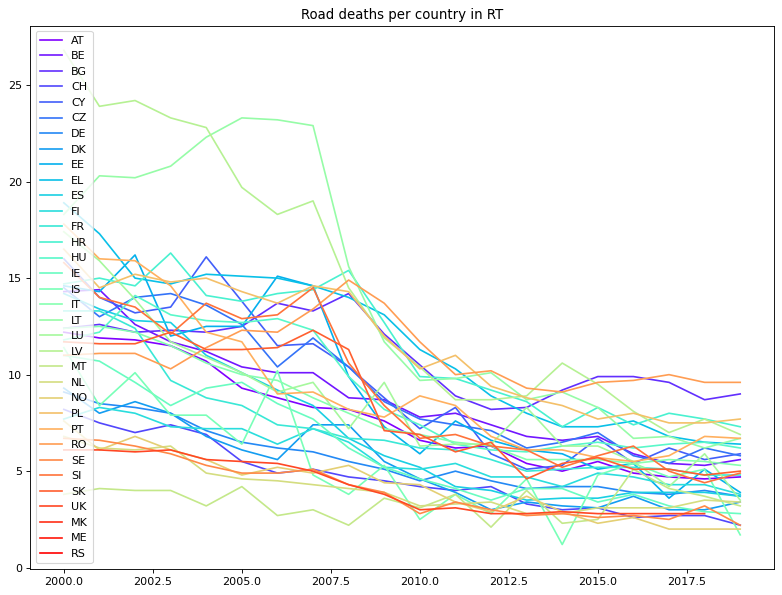

In [149]:
def plot_road_deaths_by_country_rt_unit(plot_title):  
    figure(figsize=(12, 9), dpi=80)
    #get list of countries
    countries=df_air["Country"].unique()
    countries=np.delete(countries,[11,12,13])
    n=len(countries)
    #generate colors
    color = cm.rainbow(np.linspace(0, 1, n))
    i=0
    for country in countries:    
        plt.plot(df_road_deaths[df_road_deaths["Unit"]=="RT"][df_road_deaths[df_road_deaths["Unit"]=="RT"]["Country"]==country]["Year"],df_road_deaths[df_road_deaths["Unit"]=="RT"][df_road_deaths[df_road_deaths["Unit"]=="RT"]["Country"]==country]["RoadTrafficDeaths"],c=color[i],label=country)
        i=i+1
    #show legend
    plt.legend(loc='upper left')
    plt.title(plot_title)
    plt.show()
    
plot_road_deaths_by_country_rt_unit  ("Road deaths per country in RT")  

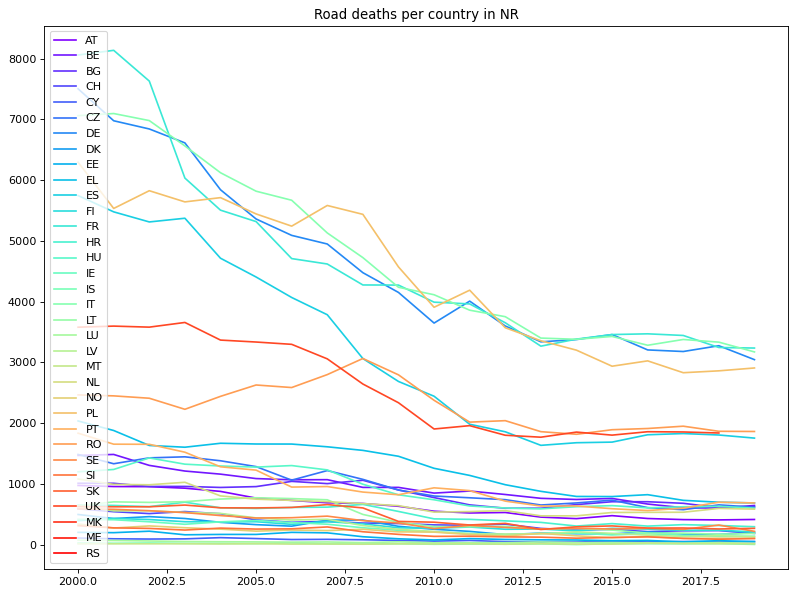

In [150]:
def plot_road_deaths_by_country_nr_unit(plot_title):  
    figure(figsize=(12, 9), dpi=80)
    #get list of countries
    countries=df_air["Country"].unique()
    #delete EU aggregated data
    countries=np.delete(countries,[11,12,13])
    n=len(countries)
    #generate colors
    color = cm.rainbow(np.linspace(0, 1, n))
    i=0
    for country in countries:    
        plt.plot(df_road_deaths[df_road_deaths["Unit"]=="NR"][df_road_deaths[df_road_deaths["Unit"]=="NR"]["Country"]==country]["Year"],df_road_deaths[df_road_deaths["Unit"]=="NR"][df_road_deaths[df_road_deaths["Unit"]=="NR"]["Country"]==country]["RoadTrafficDeaths"],c=color[i],label=country)
        i=i+1
    #show legend
    plt.legend(loc='upper left')
    plt.title(plot_title)
    plt.show()
    
plot_road_deaths_by_country_nr_unit  ("Road deaths per country in NR")  

We can see more fluctuations in the RT score. Overall it seems like all countries have a decreasing trend, with no outliers, which is really great to see and happy news.

!!!!!!here plot also modal_split_km and compare
!!!!!! also check countries 

### Comparison with modal split data per country

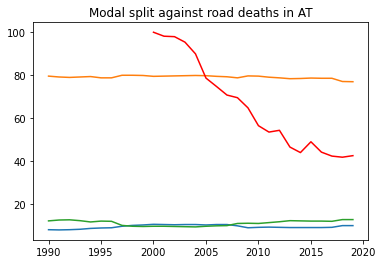

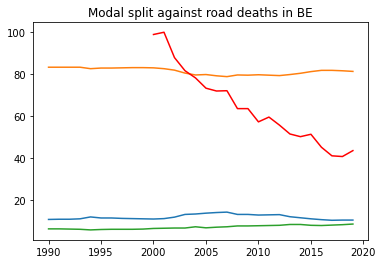

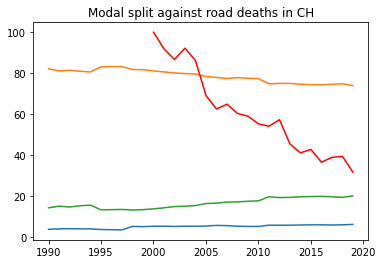

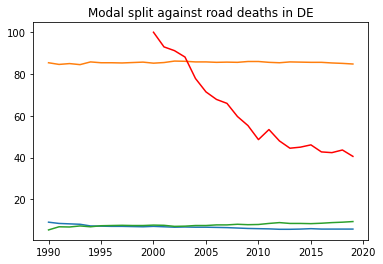

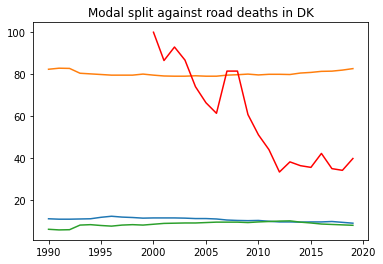

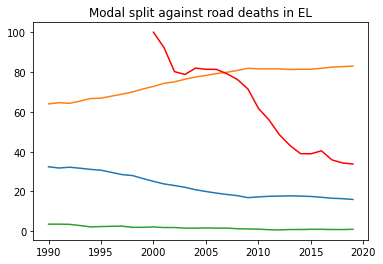

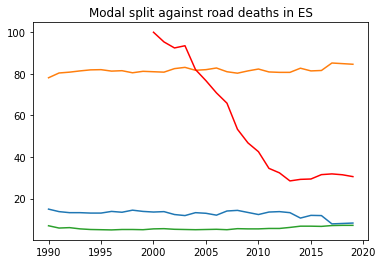

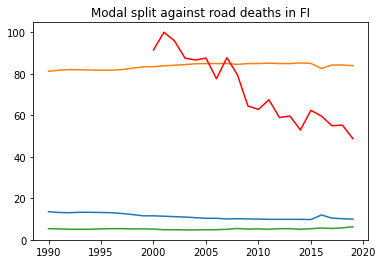

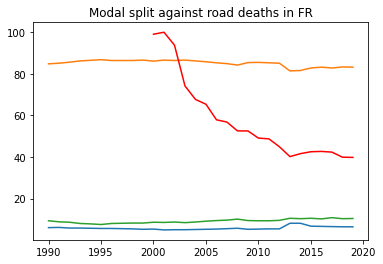

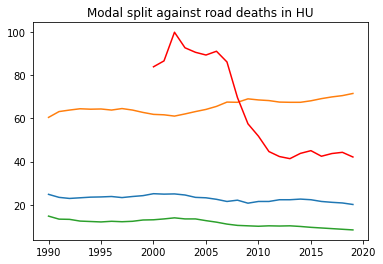

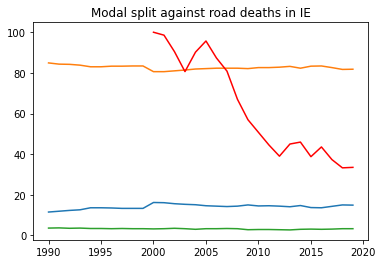

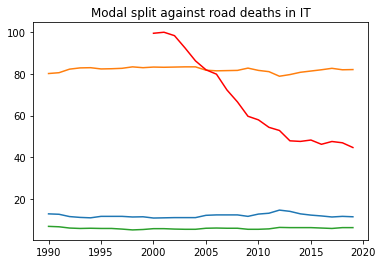

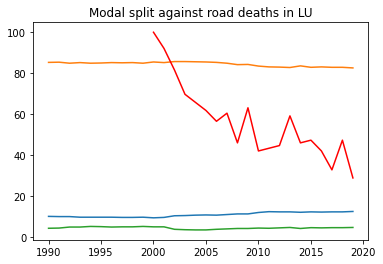

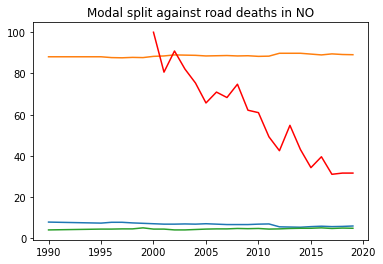

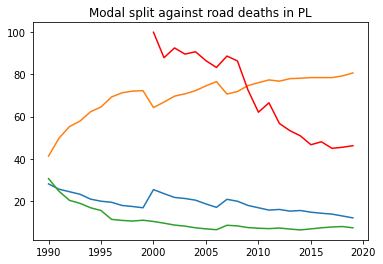

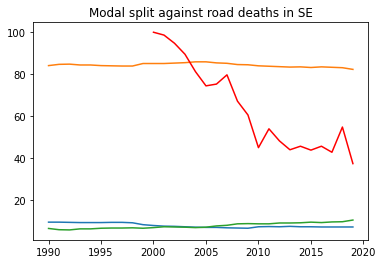

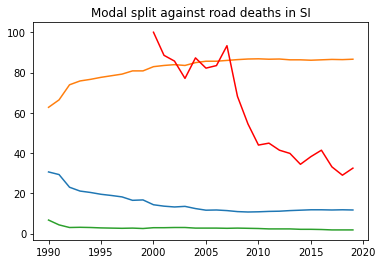

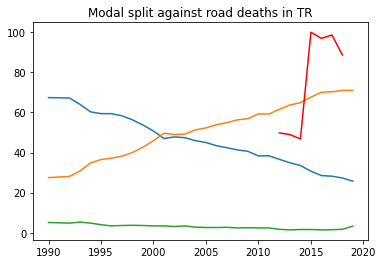

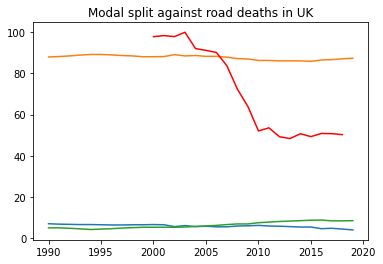

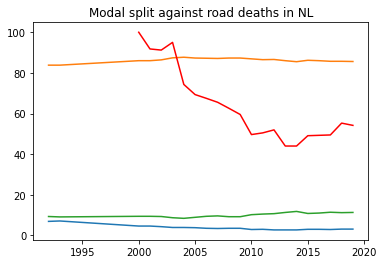

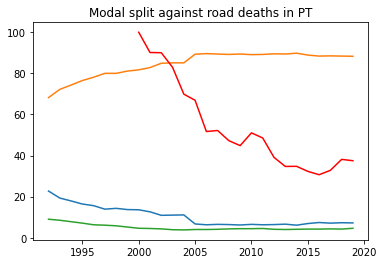

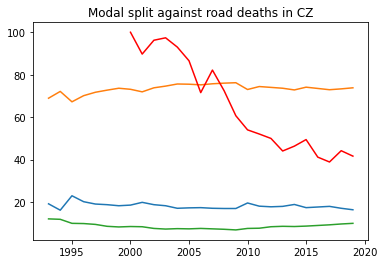

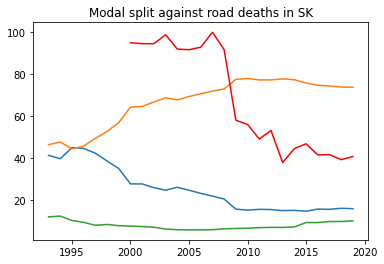

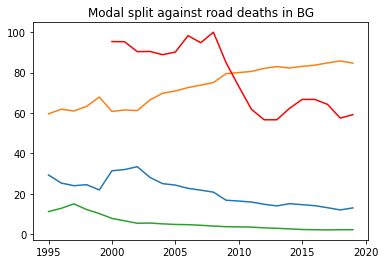

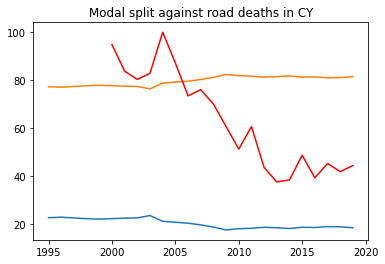

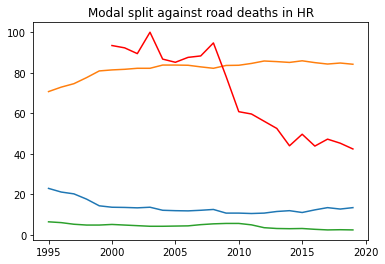

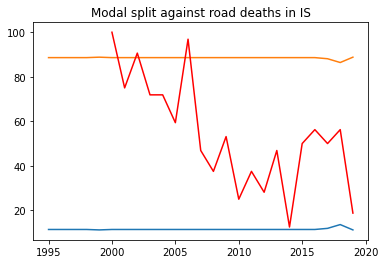

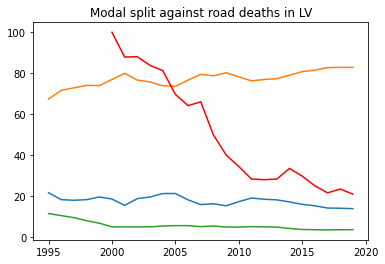

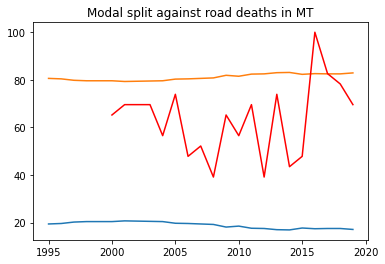

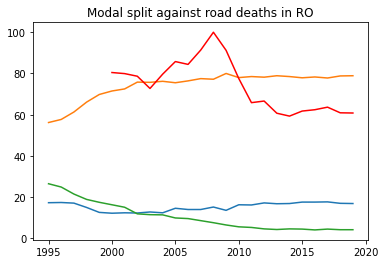

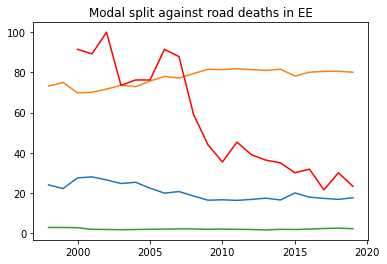

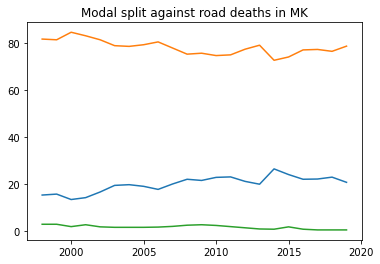

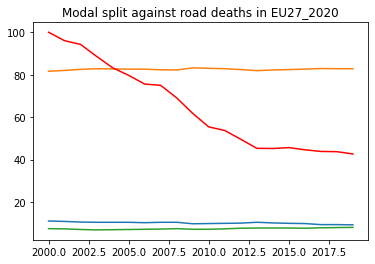

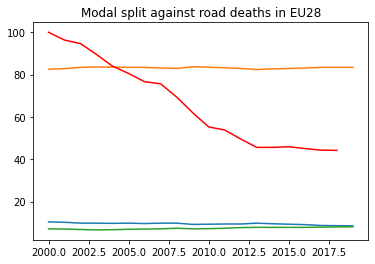

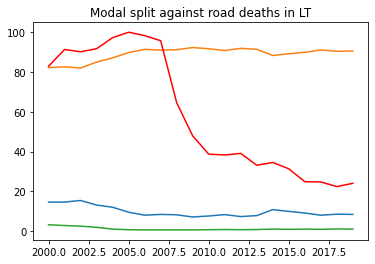

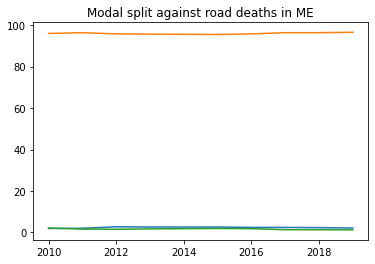

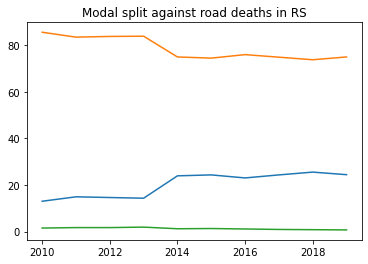

In [151]:
df_modal_split_km=pd.read_csv("/Users/mihaicata/TUW/Semester 2 W2021/Data Oriented Programming Paradigms/DOPP/RelatedToTransport/ModalSplit.csv")

def plot_modal_split_road_deaths_comparison():
    countries=df_modal_split_km["Country"].unique()    
    for cnt in countries:
        #for cnt in countries:
        modal_europe_yearly=df_modal_split_km[df_modal_split_km["Country"]==cnt].pivot_table("ModalSplitKm",["Year"],"VehicleType")
        #remove last column
        del modal_europe_yearly["TRN_BUS_TOT_AVD"]
        #add year column
        modal_europe_yearly["Yr"]=modal_europe_yearly.index.values
        modalities=["BUS_TOT","CAR","TRN"]
        #adapt for countries with no train
        if (cnt=="MT" or cnt=="IS" or cnt=="CY"):
            modalities=["BUS_TOT","CAR"]
    
        for i in modalities:
            plt.plot(modal_europe_yearly["Yr"],modal_europe_yearly[i])
        max_year=max(df_road_deaths[df_road_deaths["Unit"]=="NR"][df_road_deaths[df_road_deaths["Unit"]=="NR"]["Country"]==cnt]["RoadTrafficDeaths"],default=100)
        plt.plot(df_road_deaths[df_road_deaths["Unit"]=="NR"][df_road_deaths[df_road_deaths["Unit"]=="NR"]["Country"]==cnt]["Year"],df_road_deaths[df_road_deaths["Unit"]=="NR"][df_road_deaths[df_road_deaths["Unit"]=="NR"]["Country"]==cnt]["RoadTrafficDeaths"]/max_year*100,c="red",label=cnt)
        #print(max_year)
        plt.title('Modal split against road deaths in '+cnt)
        plt.show()


        
plot_modal_split_road_deaths_comparison()     

The road deaths data was scaled such that it shows percentages as well.

Looks like in Turkey the road deaths actually increased, although little data is available.
In Montenegro the road deaths also seem to be increasing overall.
Some countries lack road deaths data altogether.